# Experiments on Venmo data

In [1]:
from MNLogit_bfgs_torch import MNLogit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os, time

In [2]:
from IPython.display import clear_output
%matplotlib inline

In [3]:
PATH = 'venmo-data-0/'

In [4]:
uniform_filenames = sorted([PATH + x for x in os.listdir(PATH) if '151744' in x and '--1--1' in x], key=lambda x: int(x.split('-')[-5]))

In [5]:
uniform_filenames

['venmo-data-0/1517443200-1519862400-31536000-0.0100-48--1--1',
 'venmo-data-0/1517443200-1519862400-31536000-0.0100-64--1--1',
 'venmo-data-0/1517443200-1519862400-31536000-0.0100-96--1--1',
 'venmo-data-0/1517443200-1519862400-31536000-0.0100-150--1--1',
 'venmo-data-0/1517443200-1519862400-31536000-0.0100-200--1--1',
 'venmo-data-0/1517443200-1519862400-31536000-0.0100-300--1--1',
 'venmo-data-0/1517443200-1519862400-31536000-0.0100-400--1--1',
 'venmo-data-0/1517443200-1519862400-31536000-0.0100-600--1--1',
 'venmo-data-0/1517443200-1519862400-31536000-0.0100-800--1--1',
 'venmo-data-0/1517443200-1519862400-31536000-0.0100-1200--1--1',
 'venmo-data-0/1517443200-1519862400-31536000-0.0100-1600--1--1',
 'venmo-data-0/1517443200-1519862400-31536000-0.0100-2400--1--1',
 'venmo-data-0/1517443200-1519862400-31536000-0.0100-3200--1--1']

In [6]:
def fit_filename(s):
  print("Processing " + s)
  num_neg = int(s.split('-')[-5])
  train = pd.read_csv(s, header=None, sep=',').values[:,5:].reshape(-1, num_neg+1, 8)
  sws = -np.log(train[:,:,0] / train[:,:,1])
  Xs = train[:,:,[5]]
  del train
  ys = np.zeros(Xs.shape[0], dtype=int)
  Xs = np.concatenate([np.log(Xs + (Xs==0)), 1*(Xs>0)], axis=2)
  m = MNLogit(num_threads=64)
  m.data(Xs, ys, sws=sws)
  del Xs, ys, sws

  def show(model, info):
    print("Iter {} - {:.1f}s, ET: {:.1f}s, Avg Loss: {:.6f}, |H\\dw|: {:.6f}, Avg |dw| {:.6f}"\
        .format(info['num_iter'], info['iter_time'], info['total_time'], info['avg_loss'], info['inc_norm'], info['avg_grad_norm']))

  m.fit(max_num_iter=300)
  print("Done with " + s)
  return m.get_model_info()

In [7]:
from multiprocessing import Pool
with Pool(11) as p:
  uniform_results = p.map(fit_filename, uniform_filenames[:11])
# with Pool(2) as p:
#   uniform_results += p.map(fit_filename, uniform_filenames[11:])

Processing venmo-data-0/1517443200-1519862400-31536000-0.0100-200--1--1
Processing venmo-data-0/1517443200-1519862400-31536000-0.0100-64--1--1
Processing venmo-data-0/1517443200-1519862400-31536000-0.0100-48--1--1
Processing venmo-data-0/1517443200-1519862400-31536000-0.0100-400--1--1
Processing venmo-data-0/1517443200-1519862400-31536000-0.0100-96--1--1
Processing venmo-data-0/1517443200-1519862400-31536000-0.0100-150--1--1
Processing venmo-data-0/1517443200-1519862400-31536000-0.0100-1600--1--1
Processing venmo-data-0/1517443200-1519862400-31536000-0.0100-600--1--1
Processing venmo-data-0/1517443200-1519862400-31536000-0.0100-800--1--1
Processing venmo-data-0/1517443200-1519862400-31536000-0.0100-300--1--1
Processing venmo-data-0/1517443200-1519862400-31536000-0.0100-1200--1--1
Done with venmo-data-0/1517443200-1519862400-31536000-0.0100-48--1--1
Done with venmo-data-0/1517443200-1519862400-31536000-0.0100-64--1--1
Done with venmo-data-0/1517443200-1519862400-31536000-0.0100-96--1--1

In [8]:
num_negs = [int(s.split('-')[-5]) for s in uniform_filenames]

In [9]:
# col_names = ["In TXNs","Out TXNs","Unique Friends","Payer to Candidate",
#              "Candidate to Payer","Friends paid Candidate"][[2,5]]
col_names = ["Payer to Candidate"]

In [10]:
weights = np.array([sr['weights'] for sr in uniform_results]).T
ses = np.array([sr['se'] for sr in uniform_results]).T

Text(0.5,1,'Uniform, coefficient')

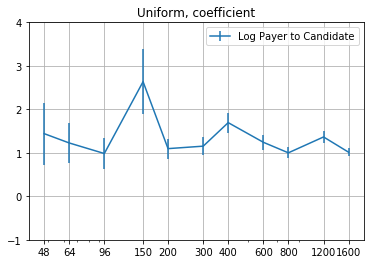

In [11]:
for i in range(1):
  plt.errorbar(x=num_negs[:-2], y=weights[i], yerr=ses[i], label='Log ' + col_names[i])

plt.xscale('log')
ticks = [48,64,96,150,200,300,400,600,800,1200,1600]#,2400,3200]
plt.xticks(ticks, ticks)
plt.grid()
plt.ylim(-1,4)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Uniform, coefficient')

Text(0.5,1,'Uniform, coefficient')

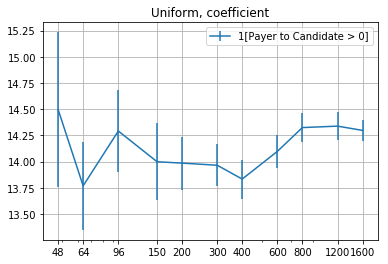

In [15]:
for i in range(1,2):
  plt.errorbar(x=num_negs[:-2], y=weights[i], yerr=ses[i], label='1[' + col_names[i%1] + ' > 0]')
  
plt.xscale('log')
ticks = [48,64,96,150,200,300,400,600,800,1200,1600]#,2400,3200]
plt.xticks(ticks, ticks)
plt.grid()
# plt.ylim(-1,16)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Uniform, coefficient')

Text(0.5,1,'Uniform, S.E')

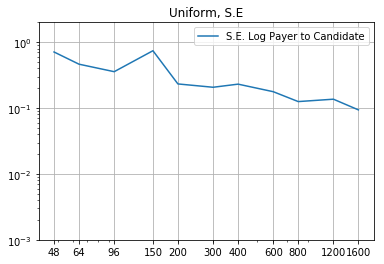

In [13]:
for i in range(1):
  plt.plot(num_negs[:11], ses[i], label='S.E. Log ' + col_names[i%1])
  
plt.xscale('log')
plt.yscale('log')
ticks = [48,64,96,150,200,300,400,600,800,1200,1600]#,2400,3200]
plt.xticks(ticks, ticks)
plt.grid()
plt.ylim(0.001,2)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Uniform, S.E')

In [14]:
for i in range(6, 12):
  plt.plot(num_negs, ses[i], label='S.E. 1[' + col_names[i%6] + ']')
  
plt.xscale('log')
plt.yscale('log')
ticks = [48,64,96,150,200,300,400,600,800,1200,1600,2400,3200]
plt.xticks(ticks, ticks)
plt.ylim(0.001,2)
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Uniform, S.E.')

IndexError: index 6 is out of bounds for axis 0 with size 2